<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

In [217]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import pandas as pd

# Set the default plot style
sns.set()

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


### 1. Is the distribution of body temperatures normal?
    
Answer:  Assuming that this sample is representative of the true population, the population temperatures is approximately normal. Most of the observations are clustered in the center (mean) and there are few observations on either end. 



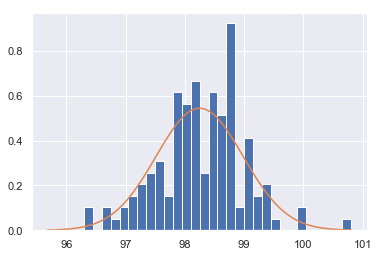

In [62]:
# Plot the temperature data
df.temperature.hist(bins=30, density=True)
x = np.linspace(tempmean - 3.5*tempstd, tempmean + 3.5*tempstd, 100)
plt.plot(x, stats.norm.pdf(x, tempmean, tempstd))
plt.show()

### 2. Is the sample size large? Are the observations independent? Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

Answer: Yes, the sample size (130) is bigger than 30. Since the true human population is very large, we can consider selecting 130 observations as an independent process. The rule of thumb is the sample size is less than 10% of the total population. 


### 3. Is the true population mean really 98.6 degrees F?

* First, try a bootstrap hypothesis test.
* Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
* In this situation, is it appropriate to use the $t$ or $z$ statistic? 
* Now try using the other test. How is the result be different? Why?

### Answers for Q3 in steps
#### First using bootstrap hypothesis test: 

Null hypothesis: The true mean is 98.6. 

For a bootstrap hypothesis test, we shift our sample data such that the mean is 98.6. 

Then using the sample distribution, we find the probability that the sample mean is at least as low as x_bar (approximately 98.25) assuming the true mean is 98.6.

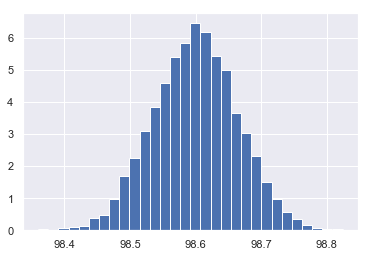

In [133]:
# Shift the sample
temp_shifted = df.temperature - df.temperature.mean()+98.6

# Initialize empty array of size 10000
sampledist = np.empty(10000)

# For each i, randomly choose 130 'with replacement' and compute its mean. 
for i in range(10000):
    sampledist[i]=np.mean(np.random.choice(temp_shifted, 130))
    
# Draw a histogram with the density parameter true. This makes the total area 1. 
_=plt.hist(sampledist, bins=30, density=True)
plt.show()

In [123]:
# Find the mean and standard deviation of the sample data. 
x_bar=df.temperature.mean()
sigma_xbar = df.temperature.std()


# Compute the p-value
p_val = np.sum(sampledist<=x_bar)/len(sampledist) 
print(format(p_val, '.10f'))

0.00000000000000000000


According to this sample, there is almost 0% probability to have mean 98.2 if the true mean is 98.6.

#### Frequentist method:

We will use two tail test because we are interested in the probability of sample mean being off from 98.6. 

Z-statistic is appropriate since the sample distribution is very close to normal. We can typically assume normality when the sample size is larger than 30. Our sample size is 130. 

We estimate the standard deviation for the sample distribution. Let us denote that by std_sd. Call the standard devation for the true population std_tp. Then the two quantities can be related using the sample size. 

<center>
std_sd = std_tp / sqrt(sample size)
</center>

However, std_tp is unknown. The standard deviation of the sample is our best guess. 

<center>
Standard Error (SE) = sigma_xbar / sqrt(130)
</center>

In [218]:
# Standard Error
SE = sigma_xbar/np.sqrt(130)
# z_score
z_score = (x_bar-98.6)/(SE)
print(z_score)

-5.454823292364079


We see from the above result that the observed sample mean, x_bar = 98.2, is more than 5 standard deviations away from the assumed sample mean 98.6. 

Python has a built in function to get the p-value assuming the sample distrubtion is normal. 

In [223]:
# p-value using z-statistic
p_z = stats.norm.cdf(x_bar, 98.6, SE)
print(format(p_z, ".10f"))

0.0000000245


What if we use the t-statistic? We need to know the degree of freedom = the sample size - 1

In [224]:
# p-value using t-statistic
dof = 129
p_t = stats.t.cdf(x_bar, dof, loc=98.6, scale=SE)
print(format(p_t, ".10f"))

0.0000001205


We see from p_z and p_t that the probablity of having the sample mean 98.2 is essentially zero if we assume the true temperature mean is 98.6. We still note that p_t > p_z. In general, t-statistic ensures that we do not underestimate p-values. 

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
    
* Which one is the correct one to use?
* What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?
    


In [108]:
# Take a small sample 
smalldata=np.random.choice(df.temperature, 10)
print(smalldata)

[ 97.6  98.2 100.8  98.4  97.6  96.7  98.2  98.5  97.4  97.8]


In [109]:
# Compute the mean and the standard deviation of smalldata
smallmean=smalldata.mean()
smallstd=smalldata.std()

Using smallstd is not a good choice as we are approximating the s.d. of true population with the s.d. of this small sample. I would assume that part of this exercise is to notice this. It would be better to use sigma_xbar (computed using the sample of size 130) in place of smallstd (computed using the sample of size 10).

In this case, t-statistic will give us a better result.

In [110]:
# z-score using smalldata
small_score = (smallmean-98.6)/(smallstd/np.sqrt(10))
print(small_score)

-1.4745865305276693


In [225]:
# p-value using t-statistic
dof = 9
p_t_small= stats.t.cdf(smallmean, 9, loc=98.6, scale=sigma_xbar/np.sqrt(10))
print(p_t_small)

0.03416660270219008


In [234]:
p_z_small= stats.norm.cdf(smallmean, 98.6, smallstd/np.sqrt(10))
print(p_z_small)

0.07016186917428181


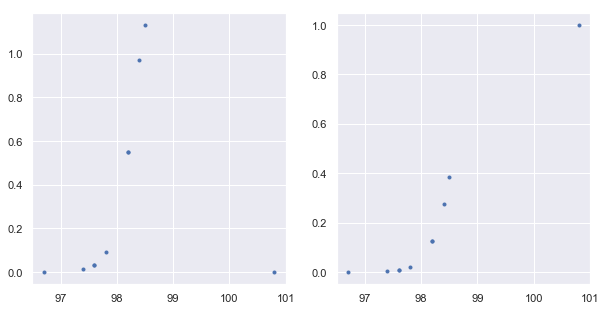

In [233]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(smalldata, stats.t.pdf(smalldata, dof, loc=98.6, scale=smallstd/np.sqrt(10)), marker=".", linestyle="none")
plt.subplot(1,2,2)
plt.plot(smalldata, stats.t.cdf(smalldata, dof, loc=98.6, scale=smallstd/np.sqrt(10)), marker=".", linestyle="none")

### 5. At what temperature should we consider someone's temperature to be "abnormal"?
* As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
* Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

#### Frequentist method: 

My own question? 

Do we assume true mean is 98.6, and compute the confidence interval around 98.6? I thought the confidence interval is typically found around an observed statistic to write a statement something like: 

We are confident that there is a 95% probability that true mean (unknown) is within [interval] of observed mean =98.2.


In [235]:
# Compute the confidence interval
conf_int= stats.norm.ppf([0.025, 0.975], 98.6, sigma_xbar)
print(conf_int)

[ 97.16298742 100.03701258]


#### Bootstrap method: 

??

In [ ]:
# confidence interval 95%
# margin of error = SE * z-score


### 6. Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

#### Shuffling:

The sample contains body temperatures of 65 male and 65 female. The difference in means, stored in the variable obsdiff, is ~0.29. We assume that this sample represents the true population well. 

We will shuffle the data and relabel the first 65 entries as female, the next 65 entries as male. We will repeat this 10000 times and compute the difference in means. 

Using this sample distribution of difference in means,we will compute the probability that the difference is at least 0.29 or bigger. 

In [248]:
female=df[df.gender =="F"].temperature
male= df[df.gender=="M"].temperature
obsdiff=female.mean()-male.mean()
obsdiff

0.289230769230727

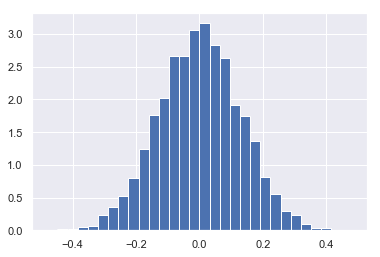

In [206]:
# Initialize the sample distribution of diffence in means
samplediff = np.empty(10000)

# Shuffle and find the difference in means 10000 times
for i in range(10000):
    perm=np.random.permutation(df.temperature)
    female_perm = perm[:65]
    male_perm = perm[65:]
    samplediff[i]=female_perm.mean()-male_perm.mean()

_=plt.hist(samplediff, bins=30, density=True)
plt.show()

In [239]:
# p_value
p_diff_val = np.sum(samplediff>=obsdiff)/len(samplediff) 
print(format(p_diff_val, '.10f'))

0.0126000000


#### Frequentist method: 

Define a new random variable X which denotes the difference between the mean body temperature of female population and th mean body temperature of male population M. 

Null hypothesis: we assume F and M have the same means, which implies X has mean 0. 

Var of X  = Var of sample distribution of sample mean of F + Var of sample distribuation of sample mean of M

std of X= np.sqrt(female.var()/65 + male.var()/65)

In [250]:
# Compute the standard deviation of X
std_x = np.sqrt(female.var()/65 + male.var()/65)

# p-value using z-statistic. 
# This is the probabiliy that the difference in means is obsdiff = 0.29 
#assuming there is no difference in mean body temperatures for females and males 

1-stats.norm.cdf(obsdiff, 0, std_x)

0.011143680380338639

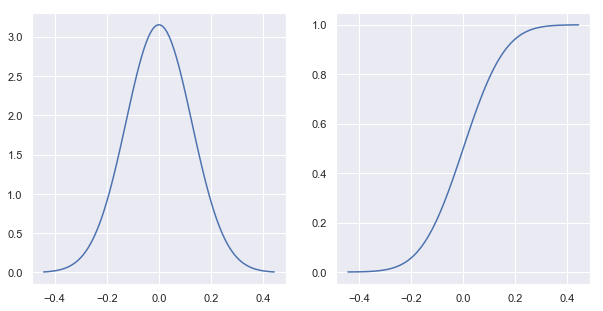

In [246]:
x=np.linspace(0 - 3.5*diffstd, 0+ 3.5*diffstd, 100)
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(x, stats.norm.pdf(x, 0, std_x))
plt.subplot(1,2,2)
plt.plot(x, stats.norm.cdf(x, 0, std_x))